## Classification Analysis using Python



KNN

In this problem, we explore the KNN classifier. You've been given a classified data set from a company, they've hidden the feature column names but have given you the data and the target classes. Please load the "Classified Data" where the target variable is "TARGET CLASS". 

(1) In KNN, the scale of the variables matters. Any variables that are on a large scale will have a much 
larger effect on the distance between the observations. Please first rescale/normalize all the predictors, and then
split data into separate training and test set.

In [226]:
## Add your code here
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [227]:
#getting the data
#Set index_col=0 to use the first column as the index
df = pd.read_csv("Classified Data.csv",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [228]:
#Standardizing the Variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [229]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [230]:
#split data into separate training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

(2) Please use the rescaled predictors to predict the target "TARGET CLASS". We'll start with k=1. Print the confusion matrix.

In [231]:
## Add your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [232]:
pred = knn.predict(X_test)
#evaluating KNN model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [233]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



(3) Explore the impact of the K value. In this problem, please try different k values from 1 to 50. For each K value, calculate the classification error rate:

$$\text{Error Rate} = \frac{\text{Misclassified items}}{\text{The number of all the testing items}}$$

Plot the Error Rate vs. K Values. What did you find? What is the best K for this dataset?

In [234]:
## Add your code here
#choosing k values
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print("Classification error rate for each of the k values between 1 to 50 are:\n" + str(error_rate))


Classification error rate for each of the k values between 1 to 50 are:
[0.07666666666666666, 0.09, 0.05, 0.07, 0.056666666666666664, 0.05, 0.06666666666666667, 0.06, 0.05, 0.056666666666666664, 0.05333333333333334, 0.04666666666666667, 0.05, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.05, 0.05333333333333334, 0.05, 0.05, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.06, 0.05, 0.056666666666666664, 0.04666666666666667, 0.05333333333333334, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.05, 0.04, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.05333333333333334, 0.05, 0.06, 0.056666666666666664, 0.05333333333333334]


Text(0, 0.5, 'Error Rate')

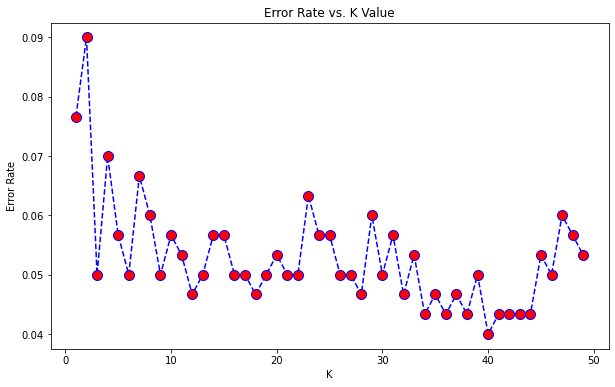

In [235]:
#Plotting the Error Rate vs. K Values.
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [236]:
'''Thus, we find from classification error and plot that the best k vales can be multiple values for the dataset which are >40 and <45. A small value of k means that noise will have a higher influence on the result and hence, we choose a larger value, i.e, k=44 as the best k for the dataset'''

'Thus, we find from classification error and plot that the best k vales can be multiple values for the dataset which are >40 and <45. A small value of k means that noise will have a higher influence on the result and hence, we choose a larger value, i.e, k=44 as the best k for the dataset'

(4) Please perform KNN (K=the best value found in question (3)) without recaling any variables, calculate the prediction accuacy and compare it with the accuacy when the variables are rescaled. What did you find? Please try to explain how the rescaling process affects the KNN performance. 

In [237]:
## Add your code here
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



WITH K=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [238]:
## Add your code here
# Comparing with K=44
knn = KNeighborsClassifier(n_neighbors=44)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=44')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=44


[[153   6]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [225]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [239]:
#without rescaling
#Create copy of dataset.
df_model = df.copy()

#Create KNN Object
knn = KNeighborsClassifier(n_neighbors=44)
#Create x and y variable
x = df_model.drop(columns=['TARGET CLASS'])
y = df_model['TARGET CLASS']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using roc
roc_auc_score(y_test, y_pred)

0.955


0.9569008972678698

In [210]:
#rescaling using StandardScalar
#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()
features = [['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
#Create KNN Object
knn = KNeighborsClassifier(n_neighbors=44)
#Create x and y variable
x = df_model.drop(columns=['TARGET CLASS'])
y = df_model['TARGET CLASS']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using roc
roc_auc_score(y_test, y_pred)


0.95


0.952313741304567

In [240]:
#rescaling using RobustScaler
#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()
features = [['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
#Create KNN Object
knn = KNeighborsClassifier(n_neighbors=4)
#Create x and y variable
x = df_model.drop(columns=['TARGET CLASS'])
y = df_model['TARGET CLASS']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using roc
roc_auc_score(y_test, y_pred)

0.925


0.9293779614880533

In [272]:
'''When the variables are rescaled, accuracy is decreased. This happens especially if some features are categorical/ordinal in nature. Furthermore, depending on rescaling method, presence of outliers for a particular feature can also make the rescaling worse for that feature. For e.g., a "min/max" or "unit variance" rescaling is going to be sensitive to outliers'''

'When the variables are rescaled, accuracy is decreased. This happens especially if some features are categorical/ordinal in nature. Furthermore, depending on rescaling method, presence of outliers for a particular feature can also make the rescaling worse for that feature. For e.g., a "min/max" or "unit variance" rescaling is going to be sensitive to outliers'

### Problem 2 (50 Points): Trees

In this problem, we explore the decision tree classifier. Please use the Car Evaluation Data Set and answer the  questions.

**Data Description**

There are 7 variables in the Car Evaluation dataset:
buying, maint, doors, persons, lug_boot, safety and class.

All the variables are categorical data type. class is the target variable.

More details can be found here:

http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

To get started, please put the dataset and the ipynb file in the same folder, and load the dataset with Pandas:

In [242]:
# importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [243]:
import warnings

warnings.filterwarnings('ignore')

In [244]:
data = 'car.data'

df = pd.read_csv(data, header=None)

In [245]:
#previewing dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [246]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [247]:
#renaming column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names
#previewing dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [248]:
#declare feature and target variables
X = df.drop(['class'], axis=1)

y = df['class']

(1) Please first split data into separate training (75%) and test set (25%), and use all six features as predictors to predict the target "class". Build a Decision Tree Classifier with criterion gini index. Compare the train-set and test-set accuracy. Is it overfitting? Why?

In [249]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [250]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1296, 6), (432, 6))

In [251]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [252]:
#encode categorical variable
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1036,med,high,4,4,small,med
757,high,low,2,2,small,med
589,high,high,3,more,med,med
907,med,vhigh,3,4,big,med
1159,med,med,4,more,big,med


In [155]:
!pip3 install category-encoders

     |████████████████████████████████| 72 kB 581 kB/s eta 0:00:01


In [253]:
# import category encoders

import category_encoders as ce

In [254]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [255]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1036,1,1,1,1,1,1
757,2,2,2,2,1,1
589,2,1,3,3,2,1
907,1,3,3,1,3,1
1159,1,4,1,3,3,1


In [256]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,1,1,2,2,2
1201,1,2,2,1,2,1
628,2,1,4,2,3,1
1498,3,1,4,1,2,1
1263,1,2,1,3,2,3


(2) Build a Decision Tree Classifier with criterion entropy. Compare the train-set and test-set accuracy. Is it overfitting? Why?

In [257]:
## Add your code here
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier



In [258]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [259]:
#Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [260]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8079


In [261]:
#Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'unacc', 'acc', ..., 'acc', 'unacc', 'acc'], dtype=object)

In [262]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7863


In [263]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7863
Test set score: 0.8079


In [265]:
'''Here, the training-set accuracy score is 0.7863 while the test-set accuracy to be 0.8079. These two values are comparable. So, there doesn't seem to be sign of overfitting.'''

"Here, the training-set accuracy score is 0.7863 while the test-set accuracy to be 0.8079. These two values are comparable. So, there doesn't seem to be sign of overfitting."